<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Code Along)

***

Week 2 | Lesson 6.1

***Titanic Dataset***

![](http://www.cunoastelumea.ro/wp-content/uploads/2017/01/titanic-620x264.jpg)

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Data Set
A description of the data set features can be found [here](https://www.kaggle.com/c/titanic/data)

In [2]:
# If your DSI repo is not store on your home directory, you'll need to change the file path
path_to_file = '~/DSI-SF-5/datasets/titanic/titanic_clean.csv' 
titanic = pd.read_csv(path_to_file)

In [6]:
## What can we tell about the entire dataset?
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


In [7]:
## How many rows and columns does the dataset has
print titanic.shape

## Lets find the type and missing values (if any)
print titanic.info()

(712, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 55.7+ KB
None


Now we have a **"cleaner"** version of our dataset, but we can not infer anything yet.

**Here is where group by comes handy**

Identify the parameters we need

***titanic.groupby?***

***Notice***
1. Groups don't really print anything interesting on their own df.groupby([var_1])
2. When assign to a variable/new data frame the var is a SeriesGroupBy object
   


In [8]:
## Group the dataset by Sex (by it own we don't get an output) 
sex_group = titanic.groupby(['Sex'])
sex_group.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


**Groups can be operated on in aggregate and they take numpy functions**

Lets take the group created before and calculate, mean, median, count and max

In [9]:
sex_group.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,440.154440,0.752896,2.073359,27.745174,0.644788,0.714286,47.332433
male,453.412804,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836


In [10]:
sex_group.median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,428,1,2,27.0,0,0,26.0
male,456,0,3,29.0,0,0,13.0


In [11]:
sex_group.max()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,,
female,888,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",63.0,5,6,512.3292,S
male,891,1,3,"van Billiard, Mr. Austin Blyler",80.0,5,5,512.3292,S


**A quick note about two popular aggregates that seem the same, but are not!**

.count() vs .size()

.count() gives us counts of record rows repeated over variable columns

.size() gives us counts as series, not repeated values over column variables

In [12]:
## Use count() to find the number of observations Per Class
sex_group.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,,
female,259,259,259,259,259,259,259,259,259
male,453,453,453,453,453,453,453,453,453


In [13]:
sex_group.size()

Sex
female    259
male      453
dtype: int64

With a Pandas **group object**,

.count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)

### Method 1
    (the one that makes more sense to me)

df.groupby( ['var_1', 'var_2', ..........] ) [ [ "what I want to know" ] ].what_metric_I_want( )

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
## Use approach 1 to find the average age of passengers group by Sex and survivorship
titanic.groupby(["Survived", "Sex"])['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.630769
          male      27.276022
Name: Age, dtype: float64

### Method 2
df.['what I want to know'].groupby( ['var_1', 'var_2', ..........] ).what_metric_I_want( )

In [15]:
## Use approach 2 to find the average age of passengers group by Sex and survivorship 
titanic['Age'].groupby(by=[titanic.Survived, titanic.Sex]).mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.630769
          male      27.276022
Name: Age, dtype: float64

In [16]:
## Use your group by from before by now add another [] to the section [what I want to know], 
## pass the column names to a list
## print the index

(titanic.groupby(['Sex', 'Survived'])['Age'] ).mean().index

MultiIndex(levels=[[u'female', u'male'], [0, 1]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'Sex', u'Survived'])

### Hierarchical Index
You can remove hierarchical index using reset_index() or passing as_index=False, inside the groupby


In [30]:
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean()

Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

In [31]:
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().add_prefix('Aver_')

Aver_Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

In [49]:
## Find the average age of passengers group by Sex and survivorship 
    ## Reset the index, use the apply function => pass np.FUNCTION, rename Age as Aver_Age (.add_prefix())

titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean()  .add_prefix('Aver_').reset_index()

,Sex,Survived,Aver_Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


In [51]:
### Lets find the Average Fare passengers paid by Class, Sex and Survivorship
    ## use apply, rename the the Fare column as Aver_Fare
titanic.groupby(['Pclass', 'Sex', 'Survived'])['Fare'].mean().reset_index()

,Pclass,Sex,Survived,Fare
0,1,female,0,110.604167
1,1,female,1,108.545261
2,1,male,0,65.229369
3,1,male,1,80.160735
4,2,female,0,18.250000
5,2,female,1,22.277635
6,2,male,0,20.933879
7,2,male,1,22.116947
8,3,female,0,18.474320
9,3,female,1,12.834043


## Let's dive into the dataset, exploring/creating subsets



### Subsets

**recall:**

df_1 = df.groupby( ['var_1', 'var_2', ..] )[ ['var_3'] ].apply(np.mean).add_prefix_('Something_').reset_index()


[apply function documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)

df['column_name'] = df['column_name'].apply(lambda x: round(x, 0)).astype(int)




In [55]:
## Create a subset called titanic_1 that shows the Average age of passengers by sex and survivorship
    ##Rename the column of interest as 'Round_ave_', round this column, the final number is an integer with no decimal points 
    ## Hint apply(lambda)

titanic.groupby(by=['Survived', 'Sex'])['Age'].apply(lambda x: x.mean())

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.630769
          male      27.276022
Name: Age, dtype: float64

In [57]:
titanic.groupby(by=['Survived', 'Sex'])['Age'].apply(lambda x: x.mean()).round()

Survived  Sex   
0         female    25.0
          male      32.0
1         female    29.0
          male      27.0
Name: Age, dtype: float64

In [59]:
## Is there a difference in average Fare paid by port of embarked and P class?
titanic.groupby(by=['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           108.246399
        Q            90.000000
        S            74.172415
2       C            26.811947
        Q            12.350000
        S            21.075000
3       C            11.369927
        Q            12.780904
        S            13.529451
Name: Fare, dtype: float64

In [60]:
## How many of them survived or not by port of Embark
    ## Lets use the aggregate function and define a list of tuples, passed it to the dataframe 
    ## [('Mean', np.mean), ('Var', np.var), ('Std', np.std), ('Count', 'count')]
titanic_group = titanic.groupby(by=['Sex', 'Pclass', 'Survived'])

In [61]:
func_tups = [('Mean', lambda x: x.mean()), 
             ('Var', np.var), 
             ('Std', np.std), 
             ('Count', 'count')]

In [62]:
titanic_group[['Age', 'Fare']].agg(func_tups)

Age                                     Fare  \
                             Mean         Var        Std Count        Mean   
Sex    Pclass Survived                                                       
female 1      0         25.666667  576.333333  24.006943     3  110.604167   
              1         34.562500  169.742880  13.028541    80  108.545261   
       2      0         36.000000  166.800000  12.915107     6   18.250000   
              1         28.080882  162.937390  12.764693    68   22.277635   
       3      0         23.818182  164.697811  12.833465    55   18.474320   
              1         19.329787  151.369854  12.303246    47   12.834043   
male   1      0         44.581967  209.026503  14.457749    61   65.229369   
              1         36.248000  223.106314  14.936744    40   80.160735   
       2      0         33.369048  147.819994  12.158125    84   20.933879   
              1         16.022000  382.089960  19.547122    15   22.116947   
       3      0         27.255814  147.275375  12.135707   215   11.825656   
              1         22.274211  133.536193  11.555786    38   14.069626   

                                                        
                                 Var         Std Count  
Sex    Pclass Survived                                  
female 1      0          5029.683802   70.920264     3  
              1          6182.421603   78.628377    80  
       2      0            48.575000    6.969577     6  
              1           124.638730   11.164172    68  
       3      0           117.905500   10.858430    55  
              1            36.352935    6.029340    47  
male   1      0          3381.415021   58.149936    61  
              1         11247.107792  106.052382    40  
       2      0           238.171218   15.432797    84  
              1           100.954169   10.047595    15  
       3      0            87.685722    9.364065   215  
              1           187.338069   13.687150    38

## What's going on here!?

_(visually)_

# (basic) Plotting with Groups


In [69]:
# This is a reminder of what our dataframe looks like
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [70]:
titanic.groupby(["Pclass"]).size()

Pclass
1    184
2    173
3    355
dtype: int64

### Groupby and graphs with more than one variable

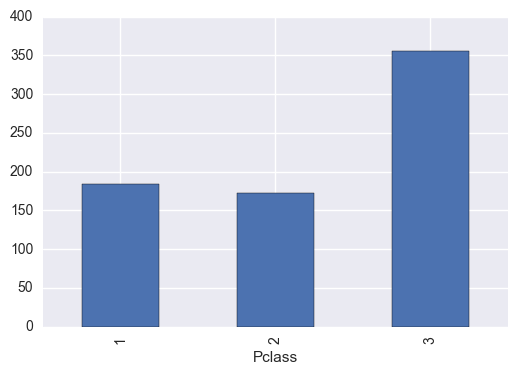

In [73]:
## Use the same code as before, make a kind='barh' graph, use unstack
titanic.groupby("Pclass").size().plot(kind='bar');

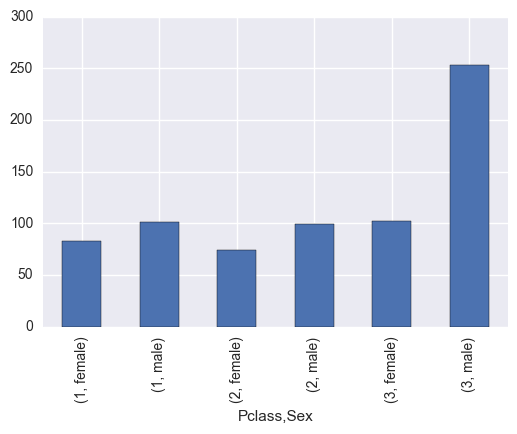

In [76]:
# Using unstack, create a kind='bar' that shows which group (men or women) survived the most
titanic.groupby(['Pclass', 'Sex']).size().plot(kind='bar');

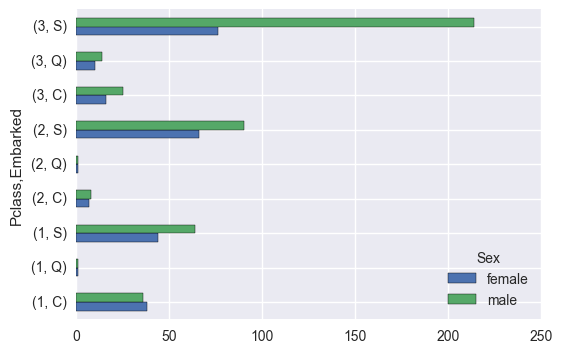

In [81]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories use stacked=True
titanic.groupby(['Pclass', 'Sex', 'Embarked']).size().unstack(level=1).plot(kind='barh');

Bar charts are great for displaying quanitites with groups and understanding quantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

***List of options for graph***

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or 'density' for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

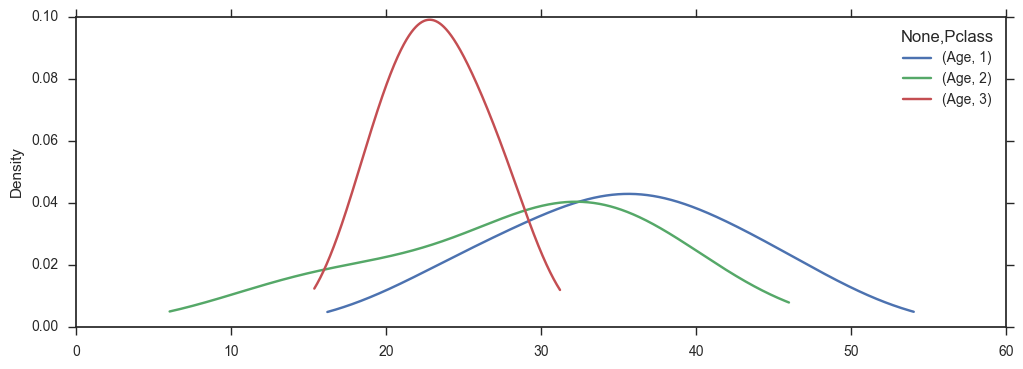

In [98]:
## Density Plot
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].mean().unstack(level=1).plot(kind="kde", ax=ax)
plt.show()

In [95]:
## A graph that doesn't use groupby, but uses a subset
subset_tita = titanic.groupby( ['Sex','Embarked', 'Age'] )[ ['Survived'] ].size().reset_index()
subset_tita.head()

,Sex,Embarked,Age,0
0,female,C,0.75,2
1,female,C,1.00,1
2,female,C,3.00,1
3,female,C,4.00,1
4,female,C,5.00,1


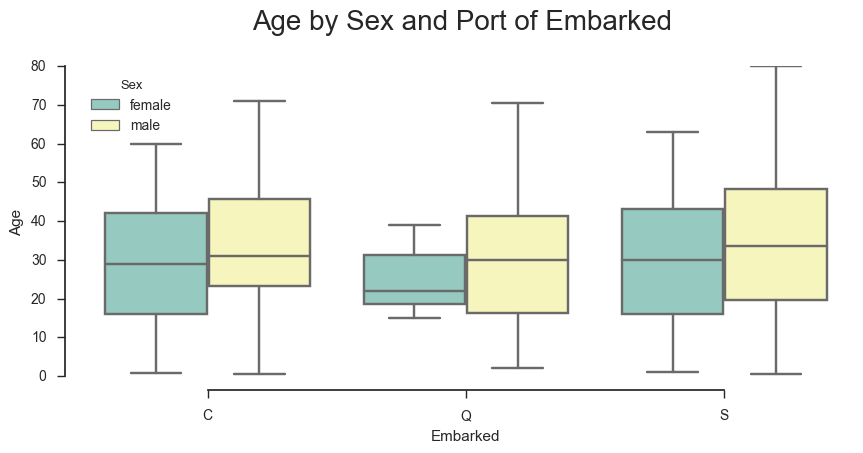

In [96]:
fig = plt.figure(figsize=(10,4))
sns.set(style="ticks")

sns.boxplot(x='Embarked', y="Age", hue="Sex", data=subset_tita, palette="Set3")
sns.despine(offset=10, trim=True)

plt.title('Age by Sex and Port of Embarked \n', fontsize = 20)
plt.show()